In [58]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.output {font-size:15pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

<b><font size="5" color="red" >ch10_N차원 배열 다루기 4절~</font></b>

# 4절. 복사와 뷰
## 4.1 할당

In [2]:
import numpy as np

In [5]:
a = np.arange(6)
a

array([0, 1, 2, 3, 4, 5])

In [6]:
b = a

In [7]:
a is b

True

In [8]:
b.shape = (2,3)
b

array([[0, 1, 2],
       [3, 4, 5]])

## 4.2 뷰(view)
- 슬라이싱할 경우 자동 view 생성

In [20]:
c = np.arange(12).reshape(2, -1)
c

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [21]:
d = c.view() # c의 뷰를 생성 : 얕은 복사
d is c # c객체와 d객체가 같냐?

False

In [22]:
id(c), id(d)

(2609900318864, 2609900307536)

In [24]:
np.all(c == d) # c와 d의 내용이 모두 같음

True

In [26]:
d.shape = (3,4)
d

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [28]:
d[0, ::2] = -99
d

array([[-99,   1, -99,   3],
       [  4,   5,   6,   7],
       [  8,   9,  10,  11]])

In [33]:
# 슬라이싱이 될 때 자동 뷰가 반환됨
c = np.arange(12).reshape(2,6)
c

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [35]:
d = c[:,:-1]
d

array([[ 0,  1,  2,  3,  4],
       [ 6,  7,  8,  9, 10]])

In [36]:
d[..., -1] = 99
d

array([[ 0,  1,  2,  3, 99],
       [ 6,  7,  8,  9, 99]])

In [37]:
c

array([[ 0,  1,  2,  3, 99,  5],
       [ 6,  7,  8,  9, 99, 11]])

## 4.3 깊은복사

In [38]:
c = np.arange(12).reshape(2,6)
c

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [41]:
d = c[:,:-1].copy() #깊은 복사
d[...,-2] = 99
d

array([[ 0,  1,  2, 99,  4],
       [ 6,  7,  8, 99, 10]])

In [42]:
c

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

# 5절. 고급인덱싱
## 5.1 인덱스 배열로 인덱싱

In [44]:
a = np.arange(12)**2
a

array([  0,   1,   4,   9,  16,  25,  36,  49,  64,  81, 100, 121])

In [47]:
a[ [0,0,1,5]]

array([ 0,  0,  1, 25])

In [48]:
# 인덱싱하기 위한 값을 배열로 만듬
i = np.array([0,0,1,5])
a[i]

array([ 0,  0,  1, 25])

In [55]:
# 인덱싱하기 위한 값을 배열로 만듬
j = np.array([[0,0],
              [1,5]])
a[j]

array([[ 0,  0],
       [ 1, 25]])

In [73]:
palette = np.array( [ [0,0,0],          # black 0
                    [255,0,0],          # red 1
                    [0,255,0],          # green 2
                    [0,0,255],          # blue 3
                    [255,255,255],      # white 4
                    [255,215,0]] )      # gold 5

In [74]:
image_index = np.array([[4,4,4,5,5,5,5,4,4,4],
                        [4,0,0,4,4,4,4,0,0,4],
                        [0,0,4,4,4,4,4,4,0,0],
                        [0,4,4,1,4,4,3,4,4,0],
                        [0,4,4,1,4,4,3,4,4,0],
                        [0,4,4,4,4,4,4,4,4,0],
                        [0,4,4,2,4,4,2,4,4,0],
                        [4,0,4,4,2,2,4,4,0,4],
                        [4,4,0,4,4,4,4,0,4,4],
                        [4,4,4,0,0,0,0,4,4,4]])

In [75]:
image_data = palette[image_index]

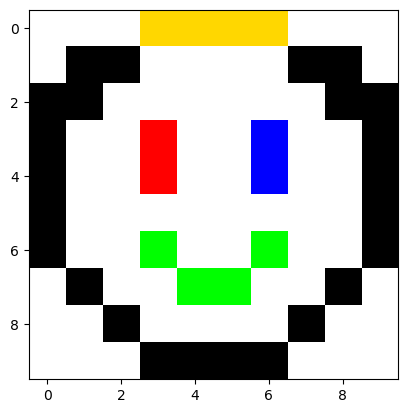

In [76]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(image_data, interpolation='nearest')
plt.show()

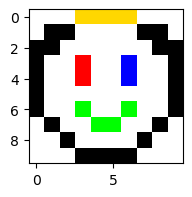

In [77]:
from matplotlib import pyplot as plt
plt.figure(figsize=(2,2))
plt.imshow(image_data)
plt.show()

## 5.2 논리 배열을 이용한 인덱싱

In [78]:
a = np.array([0,1,10,11,12,13,14,15,99])
a

array([ 0,  1, 10, 11, 12, 13, 14, 15, 99])

In [81]:
a%2==0

array([ True, False,  True, False,  True, False,  True, False, False])

In [87]:
a[a%2==0] # 논리 배열을 이용한 인덱싱 시 True 요소만 추출

array([ 0, 10, 12, 14])

In [88]:
# a에서 12보다 큰값만 추출
a[a>12]

array([13, 14, 15, 99])

# 6절. 선형대수
- 2차원 넘파이 배열을 행렬
    * 행렬곱 : @, dot(), 단위행렬
    * 역행렬 : np.linalg.inv(행렬) : 역행렬@행렬 = 단위행렬
    * 전체행렬 : 행렬.T / 행렬.transpose()

In [89]:
a = np.array([[1,2],
              [3,4]])
a # 정방행렬

array([[1, 2],
       [3, 4]])

In [90]:
# a의 역행렬 : a의 역행렬 @ a => 단위행렬
np.linalg.inv(a)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [91]:
np.linalg.inv(a) @ a

array([[1.0000000e+00, 4.4408921e-16],
       [0.0000000e+00, 1.0000000e+00]])

## 6.1 선형 연립 방정식 풀기 (독립변수1, 데이터2)

In [6]:
import numpy as np
x = np.array([2,4])  # 독립변수
Y = np.array([40,60]) # 종속변수
X = np.column_stack( (x, np.ones(len(x)))) # dstack : 차원증가
X, X.shape

(array([[2., 1.],
        [4., 1.]]),
 (2, 2))

In [11]:
Y.reshape(-1,1) # 출력결과가 나오면 Y는 그대로, return

array([[40],
       [60]])

In [12]:
#  X @ wb = Y
# (X의 역행렬) @ X @ wb = (X의 역행렬) @ Y
# wb = X의 역행렬 @ Y
wb = np.linalg.inv(X) @ Y
wb

array([10., 20.])

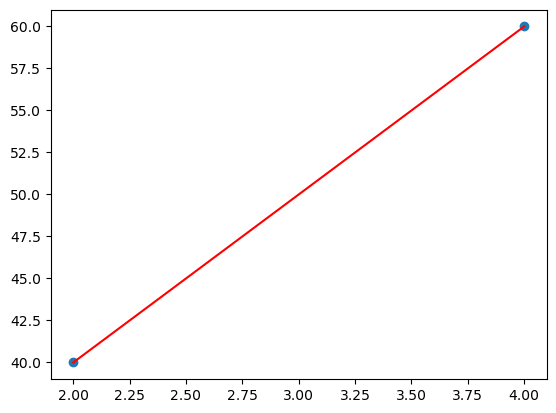

In [15]:
import matplotlib.pyplot as plt
plt.scatter(x,Y)
plt.plot(x, 10*x+20, 'r')
plt.show()

In [ ]:
# 단변랑 회귀분석

In [17]:
np.linalg.solve(X,Y) # w(기울기), b(Y절편)을 구하는 함수

array([10., 20.])

## 6.2 선형 연립방정식 풀기(회귀분석) : 독립변수 1개, 데이터 n개

In [19]:
x = np.array([32,64,96,118])
X = np.c_[x,np.ones(len(x))]
X # 정방행렬이 아님

array([[ 32.,   1.],
       [ 64.,   1.],
       [ 96.,   1.],
       [118.,   1.]])

In [20]:
# np.linalg.inv(X) X가 정방행렬이 아니면 역행렬을 구할 수 없음정방행렬이 아니면 역행렬을 구할 수 없음

LinAlgError: Last 2 dimensions of the array must be square

In [25]:
X.T, X.transpose() # 전치행렬

(array([[ 32.,  64.,  96., 118.],
        [  1.,   1.,   1.,   1.]]),
 array([[ 32.,  64.,  96., 118.],
        [  1.,   1.,   1.,   1.]]))

In [ ]:
# X의 역행렬 @ X @ wb = Y

In [26]:
X_ = X.T @ X
X_

array([[2.826e+04, 3.100e+02],
       [3.100e+02, 4.000e+00]])

In [28]:
# X 가 정방행렬이 아닌 경우, X.T @ X 로 정방행렬을 만든 후 역행렬을 곱
np.linalg.inv(X_) @ X_

array([[1., 0.],
       [0., 1.]])

In [35]:
x = np.array([32, 64, 96, 118, 126, 144, 152.5, 158])
y = np.array([18, 24, 61.5, 49, 52, 105, 130.3, 125])
X = np.c_[x,np.ones(len(x))]
Y = y.reshape(-1,1)
X,Y

(array([[ 32. ,   1. ],
        [ 64. ,   1. ],
        [ 96. ,   1. ],
        [118. ,   1. ],
        [126. ,   1. ],
        [144. ,   1. ],
        [152.5,   1. ],
        [158. ,   1. ]]),
 array([[ 18. ],
        [ 24. ],
        [ 61.5],
        [ 49. ],
        [ 52. ],
        [105. ],
        [130.3],
        [125. ]]))

In [34]:
Y = y.reshape(-1,1)
Y


array([[ 18. ],
       [ 24. ],
       [ 61.5],
       [ 49. ],
       [ 52. ],
       [105. ],
       [130.3],
       [125. ]])

In [37]:
#             X @ wb = Y
#       X_(X.T @ X) @ wb = X.T @ Y
# (X.T @ X)의 역행렬 @ X.T @ X @ wb = (X.T @ X)의 역행렬 @ X.T @ Y
# X_ 의 역행렬 @ X_ @ wb = X_의 역행렬 @ X.T @ Y
wb = np.linalg.inv(X.T @ X) @ X.T @ Y
wb

array([[  0.87493126],
       [-26.79078617]])

In [42]:
print(wb[0, 0], wb[1, 0]) # 기울기와 Y절편
y_hat = wb[0,0] * x + wb[1,0]
print('독립변수 :', x)
print('종속변수 :', y)
print('예측값 :', y_hat)

0.8749312625981291 -26.79078616795418
독립변수 : [ 32.   64.   96.  118.  126.  144.  152.5 158. ]
종속변수 : [ 18.   24.   61.5  49.   52.  105.  130.3 125. ]
예측값 : [  1.20701424  29.20481464  57.20261504  76.45110282  83.45055292
  99.19931565 106.63623138 111.44835332]


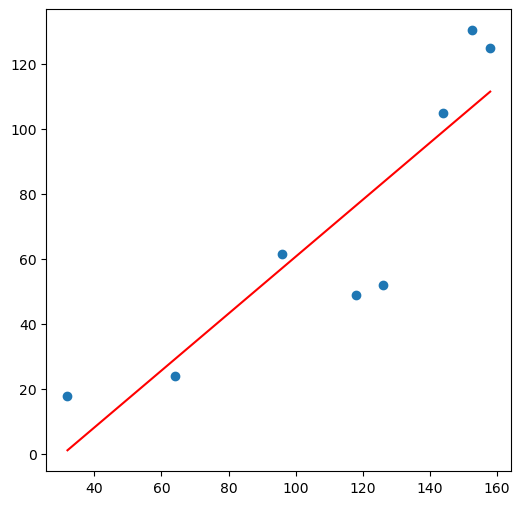

In [54]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.scatter(x, y)
plt.plot(x, y_hat, 'r')
plt.show()

# 7절. 연습문제
## 실습형

In [114]:
# 1.
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
iris_data = iris.data
iris_data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [61]:
type(iris_data)

numpy.ndarray

In [120]:
import seaborn as sns
iris_df = sns.load_dataset("iris")
iris_df[:5]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [169]:
# 열별 평균
# np.mean(iris_data)
# iris_data.mean()
iris_data.mean(axis=0)

array([5.84333333, 3.05733333, 3.758     , 1.19933333])

In [94]:
# 2.
iris_data[:5,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [95]:
# 3.
iris_data[:5,:-1]

array([[5.1, 3.5, 1.4],
       [4.9, 3. , 1.4],
       [4.7, 3.2, 1.3],
       [4.6, 3.1, 1.5],
       [5. , 3.6, 1.4]])

In [171]:
# 실습형3. 처음 다섯개 행에서 마지막 열을 제외한 나머지 열을 출력
ex3 = iris_data[:5, :-1]
ex3

array([[5.1, 3.5, 1.4],
       [4.9, 3. , 1.4],
       [4.7, 3.2, 1.3],
       [4.6, 3.1, 1.5],
       [5. , 3.6, 1.4]])

In [172]:
# 4.
iris_data[:5,-1]

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [173]:
# 실습형 4. 처음 다섯개 행에서 마지막 열만 출력
ex4 = iris_data[:5,-1] #iris_data[:5,-1:]라고 하면 5행1열로 됨
ex4

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [174]:
# 실습형 5. 3번배열과 4번배열을 원래 모양으로 합하기
answer1 = np.c_[ex3,ex4]
answer2 = np.column_stack((ex3, ex4))
answer3 = np.hstack((ex3, ex4[:, np.newaxis]))
answer4 = np.hstack( (ex3, ex4.reshape(-1,1)))
answer5 = np.concatenate( (ex3, ex4.reshape(-1, 1)), axis=1)
print(answer1)
# 위의 5개 답이 다 같은지 여부
answers = [answer1, answer2, answer3, answer4, answer5]
# all([np.all(answer1 == answer) for answer in answers])
all(np.all(answer1 == answer) for answer in answers)
# np.all(answer1 == answer1)
# np.all(answer1 == answer2)
# np.all(answer1 == answer3)
# np.all(answer1 == answer4)
# np.all(answer1 == answer5)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


True

In [110]:
# 5.
a = iris_data[:5, :-1]
b = iris_data[:5, -1].reshape(-1, 1)
np.hstack((a,b))

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [175]:
# 6.
# iris_data[:5].mean()
x = iris_data[:5]
np_mean = np.mean(x, axis=0)

np.where(x > np_mean, x, None)

array([[5.1, 3.5, None, None],
       [4.9, None, None, None],
       [None, None, None, None],
       [None, None, 1.5, None],
       [5.0, 3.6, None, None]], dtype=object)

## 문제풀이형

In [138]:
# 1. 정답 : 3번
import numpy as np
a = np.arange(12).reshape(3,4)
a
print(a.sum(0))

[12 15 18 21]


In [144]:
# 2. 정답 : 3번
a = np.floor(10*np.random.random((3,4)))
a.T

array([[3., 0., 9.],
       [7., 6., 5.],
       [4., 2., 4.],
       [2., 8., 4.]])

In [151]:
# 3. 정답 : 1번
a = np.arange(12).reshape(3,4)
a[:2]

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [152]:
# 4. 정답 : 2번
a = np.array([1,2,3,4,5])
a[[1,3,4]] = 0
a

array([1, 0, 3, 0, 0])

In [156]:
# 5. 정답 : 2번
a = np.array([1,2,3,4,5])
b = np.array([6,7,8,9,10])


[[array([1, 2, 3, 4, 5])], [array([ 6,  7,  8,  9, 10])]]